In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.style as style

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Calculate total rides, total drivers, and total fares for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
# Calculate average fare, and average fare per driver for each city type
avg_fares_per_ride = total_fares / total_rides
avg_fares_per_driver = total_fares / total_drivers

In [8]:
# Create summary data frame
index = pyber_data_df.groupby(["type"])
summary_df = pd.DataFrame({'Total Rides': total_rides, 'Total Drivers': total_drivers, 'Total Fares': total_fares, 'Average Fare per Ride': avg_fares_per_ride, 'Average Fare per Driver': avg_fares_per_driver})

# Format summary data frame
summary_df['Total Rides'] = summary_df['Total Rides'].map("{:,}".format)
summary_df['Total Drivers'] = summary_df['Total Drivers'].map("{:,}".format)
summary_df['Total Fares'] = summary_df['Total Fares'].map("${:,.2f}".format)
summary_df['Average Fare per Ride'] = summary_df['Average Fare per Ride'].map("${:.2f}".format)
summary_df['Average Fare per Driver'] = summary_df['Average Fare per Driver'].map("${:.2f}".format)

summary_df.index.name = None

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [9]:
# Reset column names and indices on pyber_data_df
new_column_names = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}
pyber_data_df = pyber_data_df.rename(columns = new_column_names)
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [10]:
# Create a copy of pyber_data_df data frame & dropping extra columns
pyber_data_df_copy1 = pyber_data_df.copy().drop(['Ride Id','City','No. Drivers'], axis = 1)
pyber_data_df_copy1

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [11]:
# Check the info on pyber_data_df_copy1
pyber_data_df_copy1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [12]:
# Calculate the sum() of fares by the type of city and date on a new DataFrame. 
pyber_data_df_FareSum = pyber_data_df_copy1.groupby(["City Type","Date"]).sum().reset_index()
pyber_data_df_FareSum.head(20)

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
5,Rural,2019-01-08 06:19:45,19.39
6,Rural,2019-01-09 15:30:35,31.84
7,Rural,2019-01-11 04:39:27,16.42
8,Rural,2019-01-14 07:09:17,18.05
9,Rural,2019-01-14 15:58:48,54.10


In [13]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row
pyber_data_pivottable = pd.pivot_table(pyber_data_df_FareSum, index=['Date'],
                    columns=['City Type'], aggfunc=np.sum)
pyber_data_pivottable

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [14]:
#Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28'
pyber_data_dates = pyber_data_pivottable.loc ['2019-01-01':'2019-04-29']
pyber_data_dates

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [15]:
# Create a new DataFrame by setting the previous DataFrame with resample() in weekly bins, and calculate the sum() of the fares for each week
pyber_data_dates.index = pyber_data_dates.index.astype('datetime64[ns]') # Set to DatetimeIndex
pyber_data_dates_resample = pyber_data_dates.resample('W').sum()
pyber_data_dates_resample

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

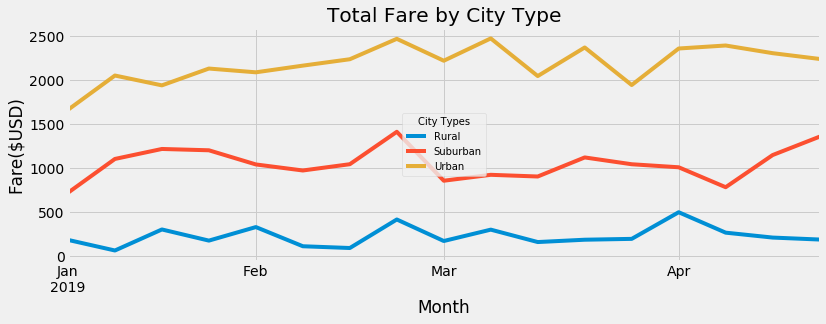

In [16]:
# Plotting final results
style.use('fivethirtyeight')
pyber_data_plot = pyber_data_dates_resample.plot(figsize = (12,4))
plt.title('Total Fare by City Type')
plt.xlabel('Month')
plt.ylabel('Fare($USD)')
#plt.xlim('Jan','May')
lgnd = plt.legend(fontsize="10", mode="Expanded", scatterpoints=1, loc="center", title="City Types", labels = ['Rural','Suburban','Urban'])
lgnd.get_title().set_fontsize(10)
plt.savefig('analysis/Challenge 5')